# Exo8 - Lorenz par Numa Gout 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Question 1 : 

On s'intéresse au flot de Lorenz défini par :

$$\left\{\begin{matrix}
\dot{x} = \sigma(y-x)\\ 
\dot{y} = -xz+rx-y\\ 
\dot{z} = xy-bz
\end{matrix}\right.$$

avec $\sigma = 10$, $b = 8/3$ et $r = 28$

Les positions d'équilibres sont pour $\dot{x}=\dot{y}=\dot{z}=0$, on trouve donc :

Si $r>1$: $\left\{\begin{matrix}
x_1 = 0\\
y_1 = 0\\
z_1 = 0
\end{matrix}\right.$, $\left\{\begin{matrix}
x_2 = \sqrt{b(r-1)}\\
y_2 = \sqrt{b(r-1)}\\
z_2 = r-1
\end{matrix}\right.$ et $\left\{\begin{matrix}
x_3 = - \sqrt{b(r-1)}\\
y_3 = - \sqrt{b(r-1)}\\
z_3 = r-1
\end{matrix}\right.$

Et si $r \leq 1$ il n'y a que la solution nulle

**Stabilité des positions d'équilibre**

On a l'équation $\frac{\mathrm{d}\overrightarrow{x}}{\mathrm{d} t} = \overrightarrow{f}(\overrightarrow{x})$

D'après le cours, en posant $u = x - x_e$ et en faisant un développement linéaire en 0 on obtient l'équation : 

$$\frac{\mathrm{d}\overrightarrow{u}}{\mathrm{d} t} = Au$$, avec $A$ la jacobienne de $\overrightarrow{f}$ au point d'équilibre.

De plus : $A = \begin{pmatrix}
-\sigma & \sigma & 0\\ 
r-z & -1 & 0\\ 
y & x & -b
\end{pmatrix}$, on a donc : $det(A) = b\sigma (r-1-z) $ and $tr(A) = -\sigma -1 -b < 0$, donc toutes les positions d'équilibres sont instables.

## Question 2 :  

Nous allons résoudre numériquement les équations et les tracer en fonction de $t$

In [2]:
def resolution(s, b, r, x0, y0, z0, N, t):
    '''Renvoie le T, les points X, les point Y, les points Z et leurs dérivées respectives correspondantes pour le flot de Lorenz de paramètre s, b et r et de point de départ x0, y0 et z0'''
    T = np.linspace(0, (N+1)*t, N+1) # Initialisation du Temps
    X = [x0] # Initialisation des points X
    Y = [y0] # Initialisation des points Y
    Z = [z0] # Initialisation des points Z
    Xpoint = []
    Ypoint = []
    Zpoint = []
    for n in range(N):
        # calcul les derivees aux points
        xprime = s*(Y[-1]-X[-1])
        yprime = -X[-1]*Z[-1]+r*X[-1]-Y[-1]
        zprime = X[-1]*Y[-1] - b*Z[-1]
        X.append(t*xprime + X[-1])
        Y.append(t*yprime + Y[-1])
        Z.append(t*zprime + Z[-1])
        Xpoint.append(xprime)
        Ypoint.append(yprime)
        Zpoint.append(zprime)
    Xpoint.append(s*(Y[-1]-X[-1]))
    Ypoint.append(-X[-1]*Z[-1]+r*X[-1]-Y[-1])
    Zpoint.append(X[-1]*Y[-1] - b*Z[-1])
    return T, X, Y, Z, Xpoint, Ypoint, Zpoint

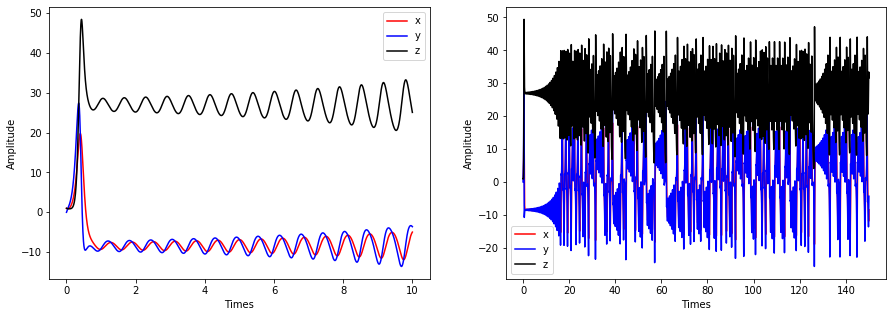

In [3]:
# On plot l'evolution de x, y, z en fonction de t
fig = plt.figure(figsize = (15,5))

T, X, Y, Z, Xpoint, Ypoint, Zpoint = resolution(10, 8/3, 28, 1, 0, 1, 10000, 0.001)
ax = fig.add_subplot(1, 2, 1, xlabel = 'Times', ylabel = 'Amplitude')
ax.plot(T, X, color = 'red', label = 'x')
ax.plot(T, Y, color = 'blue', label = 'y')
ax.plot(T, Z, color = 'black', label = 'z')
ax.legend()

T, X, Y, Z, Xpoint, Ypoint, Zpoint = resolution(10, 8/3, 28, 1, 0, 1, 50000, 0.003)
ax = fig.add_subplot(1, 2, 2, xlabel = 'Times', ylabel = 'Amplitude')
ax.plot(T, X, color = 'red', label = 'x')
ax.plot(T, Y, color = 'blue', label = 'y')
ax.plot(T, Z, color = 'black', label = 'z')
ax.legend()

On peut donc remarquer que x, y et z ne divergent pas, de plus il semblerait que x soit très proche de z (voire égaux). De plus on remarque une certaine convergence de la moyenne.

## Question 3 :

Nous allons calculer la section de point Pointcaré $xz - bz = 0$.

Cette section est intéressante car elle correspont aux points d'annulations de la fonction $\dot{z}$, c'est à dire aux extrémums de $z$.

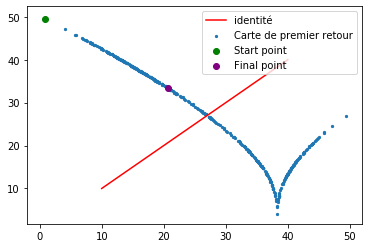

In [4]:
# On va tracer la carte de premier retour de la section de pointcare xz-bz=0
T, X, Y, Z, Xpoint, Ypoint, Zpoint = resolution(10, 8/3, 28, 1, 0, 1, 50000, 0.003)
XYBZ = [X[i]*Y[i]-8/3*Z[i] for i in range(len(Y))]
indicepointcare = []
for i in range(len(XYBZ)-1):
    if XYBZ[i]*XYBZ[i+1]<=0: # Condition d'annulation de XY-bZ (passage de positif a negatif)
        indicepointcare.append(i)
Zn = []
Zn1 = []
for i in range(len(indicepointcare)-1): # On extrait les valeurs des extremums
    Zn.append(Z[indicepointcare[i]])
    Zn1.append(Z[indicepointcare[i+1]])
plt.scatter(Zn, Zn1, s = 5, label = 'Carte de premier retour')
plt.plot([10, 40], [10, 40], color = 'red', label = "identité")
plt.scatter(Zn[0], Zn1[0], color  ='green', label = 'Start point')
plt.scatter(Zn[-1], Zn1[-1], color = 'purple', label = 'Final point')
plt.legend()

On remarque donc que les points ne se stabilise pas vers un point d'équilibre

## Question 4 : 

Nous allons tracer la section de point carré $z=r-1$.
Cela correspond au plan d'équilibre non-nul de z 

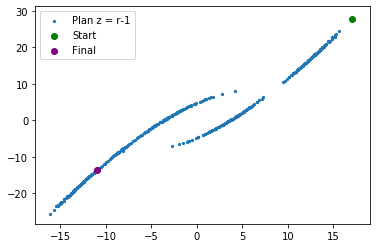

In [5]:
# On va tracer la carte de premier retour de la section de pointcare z=r-1
T, X, Y, Z, Xpoint, Ypoint, Zpoint = resolution(10, 8/3, 28, 1, 0, 1, 50000, 0.003)
pointcare = [Z[i]-28+1 for i in range(len(Z))]
indicepoint = []
for i in range(len(pointcare)-1):
    if pointcare[i]*pointcare[i+1] <= 0: # Condition d'annulation
        indicepoint.append(i)
Xpointcare = [X[i] for i in indicepoint]
Ypointcare = [Y[i] for i in indicepoint]
plt.scatter(Xpointcare, Ypointcare, s = 5, label = 'Plan z = r-1')
plt.scatter(Xpointcare[0], Ypointcare[0], color = 'green', label = 'Start')
plt.scatter(Xpointcare[-1], Ypointcare[-1], color = 'purple', label = 'Final')
plt.legend()

Nous observons donc tous les points qui verifient $z=r-1$. Nous voyons donc deux courbes, qui corresponde à l'aller ($z$ croissant) et au retour ($z$ décroissant)

## Question 5 : 

On calcule la dérivée de Lie : $\frac{\mathrm{d}\dot{x}}{\mathrm{d} x}+\frac{\mathrm{d}\dot{y}}{\mathrm{d}y}+\frac{\mathrm{d}\dot{z}}{\mathrm{d}z}$

In [6]:
# On calcule la derivee de Lie sur une trajectoire et on renvoie la moyenne
T, X, Y, Z, Xpoint, Ypoint, Zpoint = resolution(10, 8/3, 28, 1, 0, 1, 50000, 0.003)
derivX = [(Xpoint[i+1]-Xpoint[i])/(X[i+1]-X[i]) for i in range(len(X)-1)]
derivY = [(Ypoint[i+1]-Ypoint[i])/(Y[i+1]-Y[i]) for i in range(len(Y)-1)]
derivZ = [(Zpoint[i+1]-Zpoint[i])/(Z[i+1]-Z[i]) for i in range(len(Z)-1)]
Lie = [derivX[i]+derivY[i]+derivZ[i] for i in range(len(derivX))]
np.array(Lie).mean()

69.1911836006318

Text(0.5, 0.92, 'Start point = (0.5, 0.5, 0.5)')

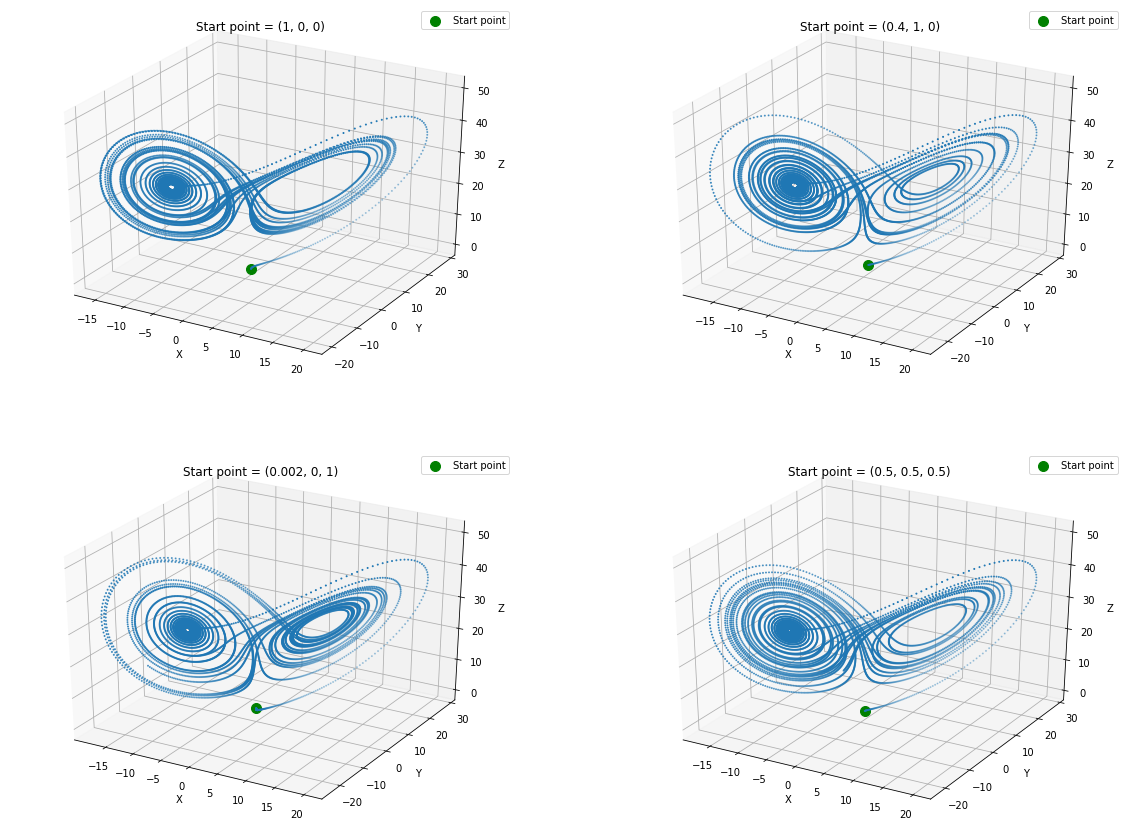

In [7]:
# On plot les trajectoires en 3D
fig = plt.figure(figsize = (20, 15))

T, X, Y, Z, Xpoint, Ypoint, Zpoint = resolution(10, 8/3, 28, 1, 0, 0, 10000, 0.003)
ax = fig.add_subplot(2,2,1,projection='3d',xlabel = 'X', ylabel = 'Y', zlabel = 'Z')
ax.scatter(X, Y, Z, s = 1)
ax.scatter(X[0], Y[0], Z[0], s = 100, color = 'green', label = 'Start point')
ax.legend()
ax.set_title('Start point = (1, 0, 0)')

T, X, Y, Z, Xpoint, Ypoint, Zpoint = resolution(10, 8/3, 28, 0.4, 1, 0, 10000, 0.003)
ax = fig.add_subplot(2,2,2,projection='3d',xlabel = 'X', ylabel = 'Y', zlabel = 'Z')
ax.scatter(X, Y, Z, s=1)
ax.scatter(X[0], Y[0], Z[0], s = 100, color = 'green', label = 'Start point')
ax.legend()
ax.set_title('Start point = (0.4, 1, 0)')

T, X, Y, Z, Xpoint, Ypoint, Zpoint = resolution(10, 8/3, 28, 0.002, 0, 1, 10000, 0.003)
ax = fig.add_subplot(2,2,3,projection='3d',xlabel = 'X', ylabel = 'Y', zlabel = 'Z')
ax.scatter(X, Y, Z, s=1)
ax.scatter(X[0], Y[0], Z[0], s = 100, color = 'green', label = 'Start point')
ax.legend()
ax.set_title('Start point = (0.002, 0, 1)')

T, X, Y, Z, Xpoint, Ypoint, Zpoint = resolution(10, 8/3, 28, 0.5, 0.5, 0.5, 10000, 0.003)
ax = fig.add_subplot(2,2,4,projection='3d',xlabel = 'X', ylabel = 'Y', zlabel = 'Z')
ax.scatter(X, Y, Z, s=1)
ax.scatter(X[0], Y[0], Z[0], s = 100, color = 'green', label = 'Start point')
ax.legend()
ax.set_title('Start point = (0.5, 0.5, 0.5)')

***Estimation des exposants de Lyapunov***

Nous allons utiliser l'algorithme de Benettin pour calculer les exposants de Lyaponov.
Nous utilisons les objets $matrix$ de la library numpy qui autorise les multiplications matricielles et les transpositions.

In [8]:
def jacobienne(s, b, r, x, y, z):
    '''Retourne la jacobienne du flot de parametre a, b, c et  associee a x, y, z'''
    return np.matrix([[-s, s, 0], [r-z, -1, 0], [y, x, -b]])    

In [9]:
def orthogonalisation_gram_schmidt(B):
    ''' Prend en entree une base B et renvoie la base orthogonalisee selon la methode de Gram-Schmidt'''
    BON = []
    for i in range(len(B)):
        y = B[i].copy()
        for j in range(len(BON)):
            y -= float((BON[j].T)*(B[i]))/float((BON[j].T*BON[j])) * BON[j]
        BON.append(y)
    return BON   

In [10]:
def normalisation(B):
    '''Prend en entree une base et renvoie la base normalisee'''
    return [z/float(z.T*z) for z in B]

In [11]:
def exposant_lyapunov(s, b, r, x0, y0, z0, N, t):
    '''Renvoie les exposants de Lyapunov'''
    exposants = []
    T, X, Y, Z, Xpoint, Ypoint, Zpoint = resolution(s, b, r, x0, y0, z0, N, t)
    B = [[np.matrix([[1], [0], [0]]), np.matrix([[0], [1], [0]]), np.matrix([[0], [0], [1]])]]
    for i in range(len(X)): # Cette boucle applique la Jacobienne a tous les vecteurs de la derniere base (normee), puis l'orthogonalise
        B1 = [jacobienne(s, b, r, X[i], Y[i], Z[i])*u for u in normalisation(B[-1])]
        B1 = orthogonalisation_gram_schmidt(B1)
        B.append(B1)
    for k in range(3): # cette boucle calcule les exposants de lyapunov
        lyap = 0
        for b in B[1:]:
            lyap -= np.log(float(b[k].T*b[k]))/len(B[1:])
        exposants.append(lyap)
    return exposants

In [12]:
exposant_lyapunov(10, 8/3, 28, 1, 0, 0, 5000, 0.01)

[-2.5010238505331612, -1.3717890444832135, -0.7423292918113427]

Ce résultat est surprenant, il ne donne pas d'exposant positif, alors que ce même code fonction pour le flot de Rossler et donne des valeurs correctent.

Donc on a deux possibilités : 
- soit le plus grand exposant de lyapunov n'est pas positif
- soit mon algorithme est faux..

## Question 7 : 

Pour le paramètre $ r = 100.5$ nous obtenons la trajectoire suivante.

Text(0.5, 0.92, 'r = 100.5, Start point = (1, 0, 1)')

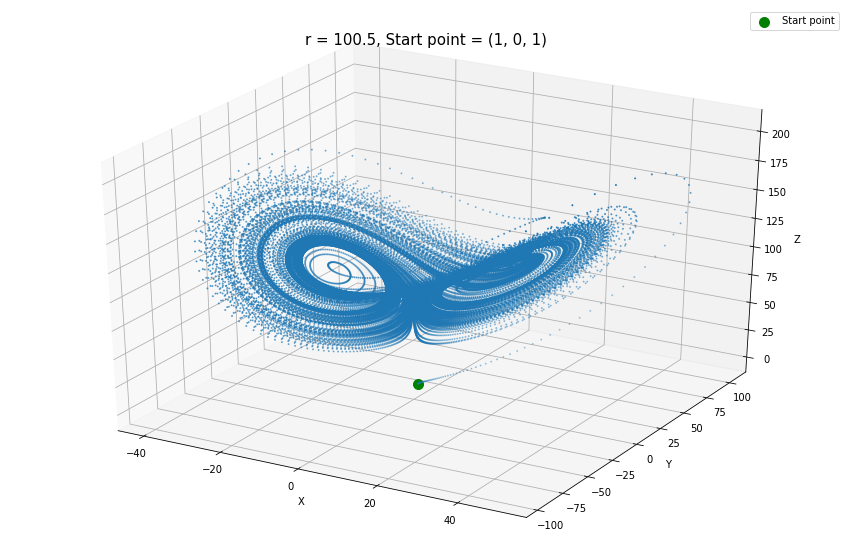

In [13]:
# On plot la trajectoires en 3D
fig = plt.figure(figsize = (15, 10))

T, X, Y, Z, Xpoint, Ypoint, Zpoint = resolution(10, 8/3, 100.5, 1, 0, 1, 50000, 0.003)
ax = fig.add_subplot(1,1,1,projection='3d',xlabel = 'X', ylabel = 'Y', zlabel = 'Z')
ax.scatter(X, Y, Z, s = 1)
ax.scatter(X[0], Y[0], Z[0], s = 100, color = 'green', label = 'Start point')
ax.legend()
ax.set_title('r = 100.5, Start point = (1, 0, 1)', fontsize = 15)

On remarque juste que les valeurs sont beaucoup plus élevées mais la forme reste la même. En effet $r$ n'est que le paramètre de controle du système.